# Google Play Store Apps Analysis
-----

## Introduction

The dataframe was collected from Kaggle https://www.kaggle.com/lava18/google-play-store-apps

Purpose of the analysis is to explore and analyze Google Play market

### 1. Import packages
-----

In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra and random sampling
import matplotlib.pyplot as plt #for plotting purpose

# set the plots to display in the Jupyter notebook
%matplotlib inline


### 2. Reading data from CSV file
-----

In [2]:
google_apps = pd.read_csv('googleplaystore.csv')

In [3]:
#Get to know no. of rows and columns of the DataFrame 'google_apps'
google_apps.shape

(10841, 13)

In [4]:
#First ten rows of the DataFrame 'google_apps'
google_apps.head(10)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   
6     178   19M      50,000+  Free     0       Everyone   
7   36815   29M   1,000,000+  Free     0       Everyone   
8   13791   33M   1,000,000+  Free     0       Everyone   
9     121  3.1M      10,000+  Free     0       Everyone   

                      Genres        Last Updated         Current Ver  \
0               Art & Design     January 7, 2018               1.0.0   
1  Art & Design;Pretend Play    January 15, 2018               2.0.0   
2               Art & Design      August 1, 2018               1.2.4   
3               Art & Design        June 8, 2018  Varies with device   
4    Art & Design;Creativity       June 20, 2018                 1.1   
5               Art & Design      March 26, 2017                 1.0   
6               Art & Design      April 26, 2018                 1.1   
7               Art & Design       June 14, 2018            6.1.61.1   
8               Art & Design  September 20, 2017               2.9.2   
9    Art & Design;Creativity        July 3, 2018                 2.8   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up  
5    2.3 and up  
6  4.0.3 and up  
7    4.2 and up  
8    3.0 and up  
9  4.0.3 and up

In [5]:
#Printing columns of DataFrame 'google_apps'
google_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
#Printing each categories in 'Category' columns
google_apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
#Printing No. of categories in 'Category' columns
google_apps['Category'].nunique()

34

In [8]:
google_apps.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

### 3. Cleaning data from DataFrame
-----

In [9]:
#Checking 'google_apps' info for non null values and data type
google_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
#let have a look at missing data 
total  = google_apps.isnull().sum().sort_values(ascending=False)
percent =  (google_apps.isnull().sum() / google_apps.isnull().count()).sort_values(ascending=False)
missing_data  = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

Total   Percent
Rating           1474  0.135965
Current Ver         8  0.000738
Android Ver         3  0.000277
Type                1  0.000092
Content Rating      1  0.000092

In [11]:
#Find out null values in every column
google_apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
#duplicate values in the 'App' column
google_apps[google_apps.duplicated(subset=['App'], keep='first')]

App       Category  Rating Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS     4.2   80805   
236                                   Box       BUSINESS     4.2  159872   
239                    Google My Business       BUSINESS     4.4   70991   
256                   ZOOM Cloud Meetings       BUSINESS     4.4   31614   
261             join.me - Simple Meetings       BUSINESS     4.0    6989   
...                                   ...            ...     ...     ...   
10715                  FarmersOnly Dating         DATING     3.0    1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4   36981   
10730                         FP Notebook        MEDICAL     4.5     410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5   33599   
10768                                AAFP        MEDICAL     3.8      63   

                     Size     Installs  Type Price Content Rating  \
229    Varies with device   5,000,000+  Free     0       Everyone   
236    Varies with device  10,000,000+  Free     0       Everyone   
239    Varies with device   5,000,000+  Free     0       Everyone   
256                   37M  10,000,000+  Free     0       Everyone   
261    Varies with device   1,000,000+  Free     0       Everyone   
...                   ...          ...   ...   ...            ...   
10715                1.4M     100,000+  Free     0     Mature 17+   
10720                4.0M   1,000,000+  Free     0       Everyone   
10730                 60M      50,000+  Free     0       Everyone   
10753                 12M   1,000,000+  Free     0       Everyone   
10768                 24M      10,000+  Free     0       Everyone   

              Genres       Last Updated         Current Ver  \
229         Business  February 26, 2018  Varies with device   
236         Business      July 31, 2018  Varies with device   
239         Business      July 24, 2018    2.19.0.204537701   
256         Business      July 20, 2018      4.1.28165.0716   
261         Business      July 16, 2018           4.3.0.508   
...              ...                ...                 ...   
10715         Dating  February 25, 2016                 2.2   
10720  Communication       July 6, 2018                 5.2   
10730        Medical     March 24, 2018           2.1.0.372   
10753       Shopping      July 30, 2018                 3.9   
10768        Medical      June 22, 2018               2.3.1   

              Android Ver  
229          4.0.3 and up  
236    Varies with device  
239            4.4 and up  
256            4.0 and up  
261            4.4 and up  
...                   ...  
10715          4.0 and up  
10720          5.0 and up  
10730          4.4 and up  
10753          4.4 and up  
10768          5.0 and up  

[1181 rows x 13 columns]

In [13]:
#checking example of App that has duplicate values
google_apps[google_apps['App']=='ZOOM Cloud Meetings']

App  Category  Rating Reviews Size     Installs  Type  \
213  ZOOM Cloud Meetings  BUSINESS     4.4   31614  37M  10,000,000+  Free   
256  ZOOM Cloud Meetings  BUSINESS     4.4   31614  37M  10,000,000+  Free   

    Price Content Rating    Genres   Last Updated     Current Ver Android Ver  
213     0       Everyone  Business  July 20, 2018  4.1.28165.0716  4.0 and up  
256     0       Everyone  Business  July 20, 2018  4.1.28165.0716  4.0 and up

In [14]:
#dropping duplicate rows
google_apps.drop_duplicates(subset=['App'], keep='first', inplace=True, ignore_index=True)

In [15]:
#replace null values from rows in 'Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver' columns
google_apps['Rating'] = google_apps['Rating'].fillna(google_apps.groupby('Category')['Rating'].transform('mean'))
google_apps.dropna(inplace=True) #droping null values
google_apps.reset_index(drop=True, inplace=True)

In [16]:
google_apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [17]:
#Changing the datatype of columns to extract information from the datatype
#Converting 'Reviews' datatype into integer
google_apps['Reviews']=google_apps['Reviews'].apply(lambda x: int(x))
# Changing Installs into int 
google_apps['Installs'].replace(to_replace='0',value='0+',inplace=True)
google_apps['Installs']=google_apps['Installs'].apply(lambda a : a.replace(',',''))
google_apps['Installs']=google_apps['Installs'].apply(lambda a : a[:-1])
google_apps['Installs']=google_apps['Installs'].astype(int)

In [18]:
#Changing 'Price' datatype into float
#first checking the unique value in 'Price' column
google_apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
#Replacing '$' with '' so that the '$' symbol will dissapear and converting into float
google_apps['Price']=google_apps['Price'].replace(r'^\$','', regex=True).astype(float)

In [20]:
#convert 'Last Updated' column to datatime
google_apps['Last Updated'] = pd.to_datetime(google_apps['Last Updated'])

In [21]:
google_apps

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9643                                   Sya9a Maroc - FR               FAMILY   
9644                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9645                             Parkinson Exercices FR              MEDICAL   
9646                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9647      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

        Rating  Reviews                Size  Installs  Type  Price  \
0     4.100000      159                 19M     10000  Free    0.0   
1     3.900000      967                 14M    500000  Free    0.0   
2     4.700000    87510                8.7M   5000000  Free    0.0   
3     4.500000   215644                 25M  50000000  Free    0.0   
4     4.300000      967                2.8M    100000  Free    0.0   
...        ...      ...                 ...       ...   ...    ...   
9643  4.500000       38                 53M      5000  Free    0.0   
9644  5.000000        4                3.6M       100  Free    0.0   
9645  4.166552        3                9.5M      1000  Free    0.0   
9646  4.500000      114  Varies with device      1000  Free    0.0   
9647  4.500000   398307                 19M  10000000  Free    0.0   

     Content Rating                     Genres Last Updated  \
0          Everyone               Art & Design   2018-01-07   
1          Everyone  Art & Design;Pretend Play   2018-01-15   
2          Everyone               Art & Design   2018-08-01   
3              Teen               Art & Design   2018-06-08   
4          Everyone    Art & Design;Creativity   2018-06-20   
...             ...                        ...          ...   
9643       Everyone                  Education   2017-07-25   
9644       Everyone                  Education   2018-07-06   
9645       Everyone                    Medical   2017-01-20   
9646     Mature 17+          Books & Reference   2015-01-19   
9647       Everyone                  Lifestyle   2018-07-25   

             Current Ver         Android Ver  
0                  1.0.0        4.0.3 and up  
1                  2.0.0        4.0.3 and up  
2                  1.2.4        4.0.3 and up  
3     Varies with device          4.2 and up  
4                    1.1          4.4 and up  
...                  ...                 ...  
9643                1.48          4.1 and up  
9644                 1.0          4.1 and up  
9645                 1.0          2.2 and up  
9646  Varies with device  Varies with device  
9647  Varies with device  Varies with device  

[9648 rows x 13 columns]

### 4. Data Visualisation
-----

In [22]:
#Top categories
pop_category = google_apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)
pop_category = pop_category.reset_index()
pop_category.head(5)

Category      Installs
0           GAME  1.387892e+10
1  COMMUNICATION  1.103828e+10
2          TOOLS  8.001272e+09
3   PRODUCTIVITY  5.793091e+09
4         SOCIAL  5.487868e+09

In [23]:
#convert the number of installs into billions for readability
pop_category['Installs']=pop_category['Installs']/(10**9)

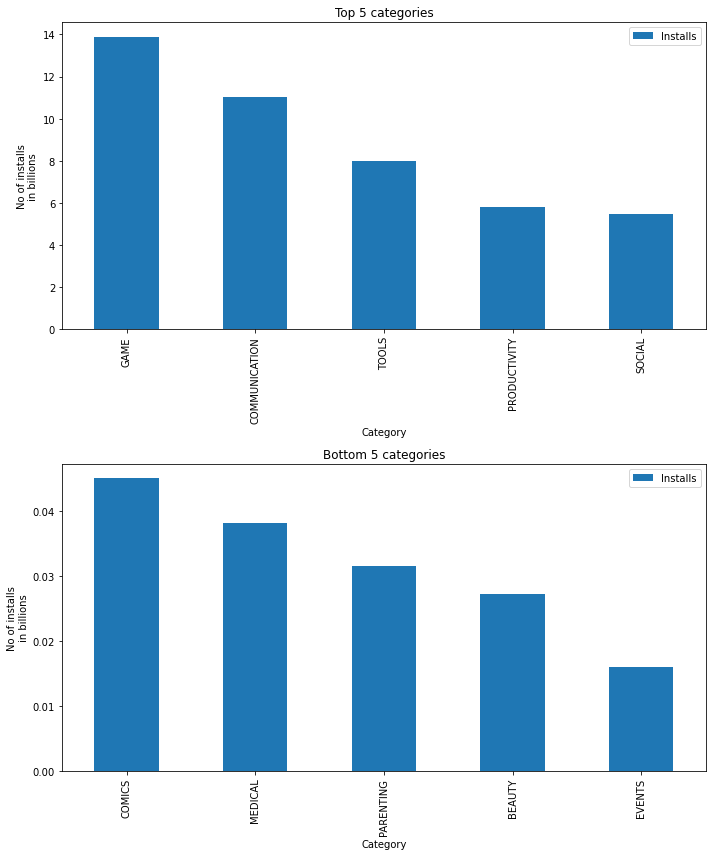

In [24]:
#Plotting bar chart for Top 5 Categories and Bottom 5 Categories
fig, ax = plt.subplots(2,1, figsize = [10,12])
ax[0].set_ylabel('No of installs\nin billions')
ax[0].set_xlabel('Category')
ax[0].set_title('Top 5 categories')
pop_category[:5].plot.bar(x='Category', ax=ax[0])

pop_category[(len(pop_category)-5):].plot.bar(x='Category', ax=ax[1])
ax[1].set_ylabel('No of installs\nin billions')
ax[1].set_xlabel('Category')
ax[1].set_title('Bottom 5 categories')
plt.tight_layout()
plt.show()

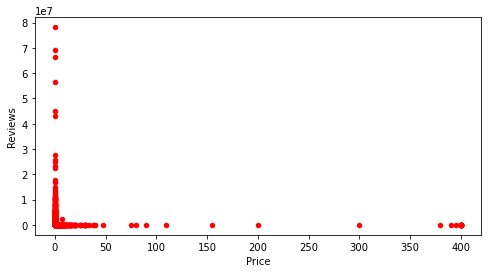

In [25]:
#Scatter plots: Show the relationship between two numerical variables
google_apps.plot(kind='scatter', x='Price', y='Reviews', \
        c='red', colormap='winter', figsize=(8,4))
plt.xlabel('Price')
plt.savefig('apps_price.png');

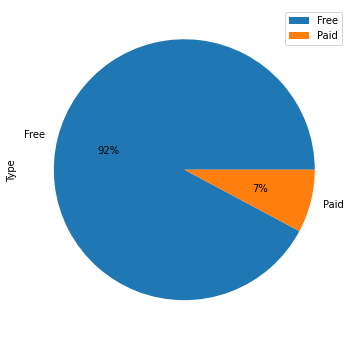

In [26]:
#Start ploting pie chart for 'Type' column to determine percentage of Paid and Free Apps in Google Play Store
plt.figure(figsize = (8,6))
google_apps["Type"].value_counts().plot(kind='pie',autopct = "%i%%")
plt.legend()
plt.show()

### 5. Applying concepts of Python by using the dataframe
-----

In [27]:
df_apps = google_apps.groupby(['Category'])['Installs'].sum()
df_apps 

Category
ART_AND_DESIGN         1.143331e+08
AUTO_AND_VEHICLES      5.313021e+07
BEAUTY                 2.719705e+07
BOOKS_AND_REFERENCE    1.665969e+09
BUSINESS               6.971649e+08
COMICS                 4.498115e+07
COMMUNICATION          1.103828e+10
DATING                 1.409261e+08
EDUCATION              3.529520e+08
ENTERTAINMENT          2.113660e+09
EVENTS                 1.597316e+07
FAMILY                 4.427881e+09
FINANCE                4.553487e+08
FOOD_AND_DRINK         2.117988e+08
GAME                   1.387892e+10
HEALTH_AND_FITNESS     1.144023e+09
HOUSE_AND_HOME         9.721246e+07
LIBRARIES_AND_DEMO     5.199591e+07
LIFESTYLE              5.038235e+08
MAPS_AND_NAVIGATION    5.032819e+08
MEDICAL                3.819318e+07
NEWS_AND_MAGAZINES     2.369218e+09
PARENTING              3.152111e+07
PERSONALIZATION        1.532484e+09
PHOTOGRAPHY            4.649148e+09
PRODUCTIVITY           5.793091e+09
SHOPPING               1.400349e+09
SOCIAL             

In [28]:
# create a function to convert 'Category' to letters
def category_to_letter(category): 
    category_dict = {
        'ART_AND_DESIGN': 'AAD',
        'AUTO_AND_VEHICLES': 'AAV',
        'BEAUTY ': 'B',
        'BOOKS_AND_REFERENCE': 'BAR',
        'BUSINESS': 'BUS'
    }
    
    try:
        return category_dict[category]
    except:
        return 'N'
category_to_letter('BUSINESS')

'BUS'

In [29]:
#print the above data by using dictionary form

dict_apps=[]
installed={}
avg_installed={}
for i in google_apps.Category.unique():
    dict_apps=(google_apps[(google_apps.Category == i)].Installs).tolist() 
    if(sum(dict_apps)>0):
        installed.update({i:sum(dict_apps)})
        avg_installed.update({i:sum(dict_apps)/len(dict_apps)})
total=sum(installed.values())
print(installed)

{'ART_AND_DESIGN': 114333100, 'AUTO_AND_VEHICLES': 53130211, 'BEAUTY': 27197050, 'BOOKS_AND_REFERENCE': 1665968576, 'BUSINESS': 697164865, 'COMICS': 44981150, 'COMMUNICATION': 11038276251, 'DATING': 140926107, 'EDUCATION': 352952000, 'ENTERTAINMENT': 2113660000, 'EVENTS': 15973161, 'FINANCE': 455348734, 'FOOD_AND_DRINK': 211798751, 'HEALTH_AND_FITNESS': 1144022512, 'HOUSE_AND_HOME': 97212461, 'LIBRARIES_AND_DEMO': 51995910, 'LIFESTYLE': 503823539, 'GAME': 13878924415, 'FAMILY': 4427881405, 'MEDICAL': 38193177, 'SOCIAL': 5487867902, 'SHOPPING': 1400348785, 'PHOTOGRAPHY': 4649147655, 'SPORTS': 1096474498, 'TRAVEL_AND_LOCAL': 2894887146, 'TOOLS': 8001271905, 'PERSONALIZATION': 1532483782, 'PRODUCTIVITY': 5793091369, 'PARENTING': 31521110, 'WEATHER': 361100520, 'VIDEO_PLAYERS': 3926902720, 'NEWS_AND_MAGAZINES': 2369217760, 'MAPS_AND_NAVIGATION': 503281890}


In [30]:
#Average Rating for each category

apps_rating={}
avg_rating={}
for i in google_apps.Category.unique():
    df_rating=(google_apps[(google_apps.Category == i)].Rating).tolist()
    if(sum(df_rating)>0):
        apps_rating.update({i:sum(df_rating)})
        avg_rating.update({i:sum(df_rating)/len(df_rating)})
print(avg_rating) 

{'ART_AND_DESIGN': 4.375748113453031, 'AUTO_AND_VEHICLES': 4.190410958904112, 'BEAUTY': 4.278571428571429, 'BOOKS_AND_REFERENCE': 4.344970414201178, 'BUSINESS': 4.098479087452469, 'COMICS': 4.181481481481483, 'COMMUNICATION': 4.121484374999992, 'DATING': 3.9701492537313494, 'EDUCATION': 4.364406779661017, 'ENTERTAINMENT': 4.135294117647058, 'EVENTS': 4.435555555555558, 'FINANCE': 4.115562913907288, 'FOOD_AND_DRINK': 4.172340425531913, 'HEALTH_AND_FITNESS': 4.2430327868852515, 'HOUSE_AND_HOME': 4.149999999999999, 'LIBRARIES_AND_DEMO': 4.179066265060242, 'LIFESTYLE': 4.093355481727566, 'GAME': 4.247368421052638, 'FAMILY': 4.179762463666333, 'MEDICAL': 4.166551724137922, 'SOCIAL': 4.24729064039409, 'SHOPPING': 4.230000000000004, 'PHOTOGRAPHY': 4.157414448669202, 'SPORTS': 4.216153846153854, 'TRAVEL_AND_LOCAL': 4.069518716577546, 'TOOLS': 4.039359837933646, 'PERSONALIZATION': 4.331584897534365, 'PRODUCTIVITY': 4.183388704318948, 'PARENTING': 4.3, 'WEATHER': 4.243055555555553, 'VIDEO_PLAYER

In [31]:
#Mapping the dataset
google_apps['Type'].dropna().unique()

array(['Free', 'Paid'], dtype=object)

In [32]:
mapping_dict = {}
class_label = 0
for type in list(google_apps['Type'].dropna().unique()):
    mapping_dict[type] = class_label
    class_label += 1
mapping_dict

{'Free': 0, 'Paid': 1}

In [33]:
google_apps['Category'] = google_apps['Type'].apply(lambda x: mapping_dict[x])
google_apps[['Category', 'Type']]

Category  Type
0            0  Free
1            0  Free
2            0  Free
3            0  Free
4            0  Free
...        ...   ...
9643         0  Free
9644         0  Free
9645         0  Free
9646         0  Free
9647         0  Free

[9648 rows x 2 columns]

In [34]:
#Paid vs Free

free = len(google_apps[google_apps.Type == 'Free'])
paid = len(google_apps[google_apps.Type == 'Paid'])
print('The numbers of free Google Store Apps are {}'.format(free))
print('The numbers of paid Google Store Apps are {}'.format(paid))

The numbers of free Google Store Apps are 8895
The numbers of paid Google Store Apps are 753
